# Unsupervised Deep Learning (SOM) Detect credit card fraud

In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [38]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = sc.fit_transform(x)

In [39]:
dataset.shape

(690, 16)

## Training SOM

In [40]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)# input_len is number of feature
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

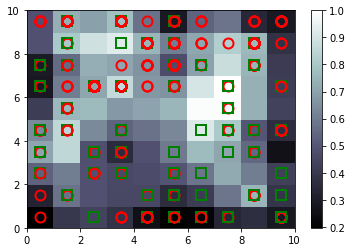

In [43]:
# Identify the outliers nurons from the SOM training
# visualise result
# calculate MID (mean into rnurons distance) #large the MID high chance of fraud
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o","s"]
colors = ["r","g"]

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
    
show()

In [46]:
# Lets find the frauds
mapping = som.win_map(X)
# mapping[(8,1) and mapping[(6,8) are the coordinates from the above graph for outliers nothing but frauds
frauds = np.concatenate((mapping[(8,1)],mapping[(6,8)]),axis=0)
frauds = sc.inverse_transform(frauds)
frauds[10]

array([1.577829e+07, 1.000000e+00, 2.500000e+01, 1.125000e+01,
       2.000000e+00, 8.000000e+00, 4.000000e+00, 2.500000e+00,
       1.000000e+00, 1.000000e+00, 1.700000e+01, 0.000000e+00,
       2.000000e+00, 2.000000e+02, 1.209000e+03])

# ==========================END===============================